<a href="https://colab.research.google.com/github/PestrikovaTatyana/Figure/blob/master/Pestrikova_homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#****Домашнее задание №1****
*июльский курс - 2020 PRO*


##***LIGHT***

###$Вариант 1$

Перепишите ноутбук по распознаванию рукописных цифр, восстановив следующие операции:
>1. Импорт библиотек.
>2. Загрузка базы mnist.
>3. Нормирование и преобразование x_train и y_train.
>4. Создание нейронной сети.
>5. Обучение нейронной сети.



In [ ]:
#Подключение различного рода библиотек и настройка вывода
from tensorflow.keras.datasets import mnist  #Подтягиваю библиотеку с базой Mnist
from tensorflow.keras.models import Sequential #Класс модели сети прямого распространения
from tensorflow.keras.layers import Dense #Класс полносвязный слой
from tensorflow.keras.layers import Dropout #Класс полносвязный слой
from tensorflow.keras.optimizers import Adam #Подключаю библиотеку оптимизаторов
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np #Подключение библиотеки numpy
import pylab #Подключение модуля для построения графиков
from mpl_toolkits.mplot3d import Axes3D #Подключение модуля для трехмерной графики
from google.colab import files #Команда для загрузки своей картинки
import matplotlib.pyplot as plt #Подключаем отрисовку изображений
from PIL import Image #Отрисовка изображений
#Отрисовка изображения для вывода в ноутбук
%matplotlib inline

In [ ]:
#Загрузка данных из библиотеки Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()
x_train_org[0].shape

11493376/11490434 [==============================] - 0s 0us/step


(28, 28)

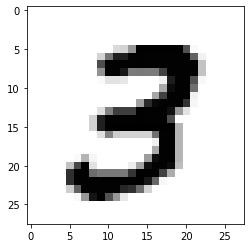

In [ ]:
#Смотрю картинки и типы отрисовок
n = 7
plt.imshow(x_train_org[n], cmap='binary')#Отрисовываю картинку
plt.show() #Вывожу картинку (из-за %matplotlib inline вывод в ноутбук)

In [ ]:
#Меняю формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
print(x_train_org.shape)
print(x_train.shape)
x_test=x_test_org.reshape(10000,784)

(60000, 28, 28)
(60000, 784)


In [ ]:
#Нормализую входные картинки
x_train= x_train.astype('float32')
x_train=x_train/255
x_test=x_test.astype('float32')
x_test=x_test/255

In [ ]:
#Преобразую ответы в формат one_hot_enoding
y_train=utils.to_categorical(y_train_org,10)
y_test=utils.to_categorical(y_test_org, 10)

In [ ]:
#Посмотрю размер y_train, должен быть массив из 60000 строк по 10 столбцов каждая
print(y_train.shape)
print(y_train_org.shape)
print(y_train[7])
print(y_train_org[7])



(60000, 10)
(60000,)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3


In [ ]:
#Создана нейронная сеть прямого распространения
simpleModel=Sequential()
#Добавляю 1 полносвязный слой
#На выходе слоя 800 нейронов
#На входе 784 ячейки картинки, [W1]=784x800
#Функция активации relu
simpleModel.add(Dense(800,input_dim=784,activation='relu')) 
#Добавляю 2 полносвязный слой 
#На выходе слоя 400 нейронов
#На входе 800 нейронов предыдущего слоя (что не указывается), [W2]=800x400
#Функция активации relu
simpleModel.add(Dense(400,activation='relu'))
#Добавляю 3 полносвязный слой 
#На выходе слоя 10 нейронов, как по количеству категорий в y
#На входе 400 нейронов предыдущего слоя (что не указывается), [W3]=400x10
#Функция активации softmax (чтобы в сумме на всем выходе было не больше 1)
simpleModel.add(Dense(10,activation='softmax'))


In [ ]:
#Готовлю модель к обучению и задам параметры, какой будет оптимизация (compile)
#Ошибку будем считать loss='categorical_crossentropy'
#Метод градиентного спуска в поиске минимума optimizer='adam'
#Вывод разницы между численными рассчетами и y_train/y_test по совпадению metrics=['accuracy']
simpleModel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Вывожу структуру модели
print(simpleModel.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Обучаю сеть
#Задаю количество примеров за один проход до изменения весов batch_size
#Задаю количество эпох, сколько раз обучается выборка по примерам размера batch_size
#Задаю визуализацию хода обучения verbose=1
simpleModel.fit(x_train,y_train,batch_size=128,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2369 - accuracy: 0.9296 - val_loss: 0.1105 - val_accuracy: 0.9670
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0828 - accuracy: 0.9753 - val_loss: 0.0871 - val_accuracy: 0.9733
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0525 - accuracy: 0.9832 - val_loss: 0.0882 - val_accuracy: 0.9737
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0354 - accuracy: 0.9885 - val_loss: 0.0809 - val_accuracy: 0.9756
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0850 - val_accuracy: 0.9778
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.1019 - val_accuracy: 0.9748
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.0975 - val_accuracy: 0.9751
Epoch 

In [ ]:
#Сохраняем полученные веса модели
simpleModel.save_weights('model.h5')
simpleModel.load_weights('model.h5')

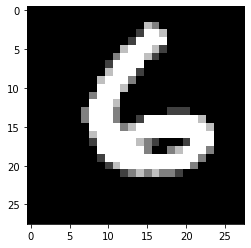

(28, 28)


In [ ]:
#Попробуем распознать тестовую цифру
n_rec=4587
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()
print(x_test_org[n_rec].shape)


In [ ]:
#Сохраним численное представление данной картинки в отдельй вектор
x=x_test[n_rec]
print(x.shape)

(784,)


In [ ]:
#Добавляю одну размерность в конец, для совпадения типов данных
#То есть делаю именно массив примеров, массив из 1 примера
x=np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [ ]:
#В переменную recPrediction (строка на 10 столбцов) записываю результат
#распознавания цифры построенной сетью и вывожу его
recPrediction=simpleModel.predict(x)
k=0
for i in recPrediction[0]:
  print(k,round(i,6))
  k+=1

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 1.0
7 0.0
8 0.0
9 0.0


In [ ]:
#В переменную prediction запишу какую именно цифру предсказывает сеть (с наибольшей вероятностью)
prediction=np.argmax(recPrediction)
print(prediction)

6


###$Вариант 2$

>Проведите серию экспериментов по перебору гиперпараметров нейронной сети, созданной на занятии.
>>1. Поменяйте количество нейронов в сети, используя следующие значения:
>>>* один слой 10 нейронов
>>>* один слой 100 нейронов
>>>* один слой 5000 нейронов
>>2. Поменяйте активационную функцию в скрытых слоях с relu на linear.
>>3. Поменяйте размеры batch_size:
>>>* 1
>>>* 10
>>>* 100
>>>* Вся база (60000)
>>4. Запишите в таблицу получившиеся точности.
>>5. Напишите выводы по результатам проведенных тестов.






#### Задание 1

In [ ]:
#Выполнение пункта 1 задания
#Создаю последовательную модель нейронной сети на 10 нейронов во внутреннем слое
#Для чистоты эксперимента возьмем модель с двумя слоями, последний слой по условию из 10 нейронов
relu10NeuronsNet=Sequential()
relu10NeuronsNet.add(Dense(10,input_dim=784,activation='relu'))
relu10NeuronsNet.add(Dense(10,activation='softmax'))
relu10NeuronsNet.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
relu10NeuronsNet.fit(x_train,y_train,batch_size=128,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 1s 3ms/step - loss: 0.9066 - accuracy: 0.7445 - val_loss: 0.4453 - val_accuracy: 0.8783
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 0.8902 - val_loss: 0.3346 - val_accuracy: 0.9028
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3313 - accuracy: 0.9060 - val_loss: 0.3021 - val_accuracy: 0.9131
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3037 - accuracy: 0.9148 - val_loss: 0.2838 - val_accuracy: 0.9202
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2890 - accuracy: 0.9186 - val_loss: 0.2757 - val_accuracy: 0.9214
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2776 - accuracy: 0.9224 - val_loss: 0.2670 - val_accuracy: 0.9237
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2687 - accuracy: 0.9247 - val_loss: 0.2631 - val_accuracy: 0.9262
Epoch 

In [ ]:
#Выполнение пункта 1 задания
#Создаю последовательную модель нейронной сети на 100 нейронов во внутреннем слое
#Для чистоты эксперимента возьмем модель с двумя слоями, последний слой по условию из 10 нейронов
relu100NeuronsNet=Sequential()
relu100NeuronsNet.add(Dense(100,input_dim=784,activation='relu'))
relu100NeuronsNet.add(Dense(10,activation='softmax'))
relu100NeuronsNet.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
relu100NeuronsNet.fit(x_train,y_train,batch_size=128,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 1s 3ms/step - loss: 0.4223 - accuracy: 0.8848 - val_loss: 0.2288 - val_accuracy: 0.9363
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.1940 - accuracy: 0.9448 - val_loss: 0.1660 - val_accuracy: 0.9536
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.1441 - accuracy: 0.9592 - val_loss: 0.1384 - val_accuracy: 0.9611
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.1160 - accuracy: 0.9669 - val_loss: 0.1207 - val_accuracy: 0.9643
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0950 - accuracy: 0.9728 - val_loss: 0.1151 - val_accuracy: 0.9678
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0802 - accuracy: 0.9764 - val_loss: 0.1078 - val_accuracy: 0.9688
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0686 - accuracy: 0.9804 - val_loss: 0.1006 - val_accuracy: 0.9712
Epoch 

In [ ]:
#Выполнение пункта 1 задания
#Создаю последовательную модель нейронной сети на 5000 нейронов во внутреннем слое
#Для чистоты эксперимента возьмем модель с двумя слоями, последний слой по условию из 10 нейронов
relu5000NeuronsNet=Sequential()
relu5000NeuronsNet.add(Dense(5000,input_dim=784,activation='relu'))
relu5000NeuronsNet.add(Dense(10,activation='softmax'))
relu5000NeuronsNet.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
relu5000NeuronsNet.fit(x_train,y_train,batch_size=128,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.2149 - accuracy: 0.9353 - val_loss: 0.1064 - val_accuracy: 0.9669
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0785 - accuracy: 0.9763 - val_loss: 0.0891 - val_accuracy: 0.9711
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0486 - accuracy: 0.9845 - val_loss: 0.0817 - val_accuracy: 0.9743
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0889 - val_accuracy: 0.9743
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0219 - accuracy: 0.9925 - val_loss: 0.0793 - val_accuracy: 0.9771
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0825 - val_accuracy: 0.9783
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0886 - val_accuracy: 0.9784
Epoch 

In [ ]:
 #Распознаем наш пример, который лежит в x
 #Занесем предсказываемое значение в переменную prediction, переменная постоянно обновляется
 # в ней хранится всегда прогнозируемая цифра каждой испытываемой модели
relu10NeuronsPrediction=relu10NeuronsNet(x)
prediction=np.argmax(relu10NeuronsPrediction)
print(prediction)

6


In [ ]:
relu100NeuronsPrediction=relu100NeuronsNet(x)
prediction=np.argmax(relu100NeuronsPrediction)
print(prediction)

6


In [ ]:
relu5000NeuronsPrediction=relu5000NeuronsNet(x)
prediction=np.argmax(relu5000NeuronsPrediction)
print(prediction)

6


---

$\Big|........Model\Big........|.loss.|Accurasy |val\_loss|val\_accuracy| Times .|$   

---


$\Big|.relu10NeuronsNet.| 0.2316 |..0.9345.|.0.2439.|....0.9305...| 1 s 02 ms |$

---
$|relu100NeuronsNet.| 0.0231 |..0.9947.|.0.1001.|....0.9718...| 1 s 03 ms |$

---
$\Big| relu5000NeuronsNet  \Big| 0.0069 |..0.9979.|.0.1389.|....0.9749...| 22 s 60 ms |$

---





>После анализа сравнительной таблицы можно прийти к выводу, что наиболее близкий к выходу результат получила модель с наибольшим числом нейронов во внутреннем слое, однако время на обучение такой модели очень большое для такой простой нейронной сети. То есть нецелесообразно вводить такой большой слой. Кроме этого по параметру accurasy модель со 100 нейронами во внутреннем слое отличается лишь на тысячные доли по отклонению численного предсказанного значения от выхода. Более того, val_loss данной модели меньше, чем у модели с 5000 нейронов во внутреннем слое.
С точки зрения распознавания изображений все три модели показали верный результат, однако, это скорее всего связано с тем, что проверялись они пока только на примере из тестовой выборки. Поскольку ошибка сети у модели с 10 нейронами значительно выше, чем у остальных образцов, а время на обучение одной эпохи сравнимо со временем обучения модели со 100 нейронами во внутреннем слое, то считаю целесообразным выбрать данную модель за опорную  и провести еще несколько экспериментов с подбором количества нейронов во внутреннем слое для уменьшения ошибки с тем, чтобы приблизить ее к значению последней модели.

In [ ]:
#Наилучший найденный результат при сравнении моделей по 1 внутреннему слою
#и вариации его количества нейронов
relu250NeuronsNet=Sequential()
relu250NeuronsNet.add(Dense(250,input_dim=784,activation='relu'))
relu250NeuronsNet.add(Dense(10,activation='softmax'))
relu250NeuronsNet.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
relu250NeuronsNet.fit(x_train,y_train,batch_size=128,epochs=15,verbose=1,validation_split=0.2)


Epoch 1/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.9083 - val_loss: 0.1791 - val_accuracy: 0.9482
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.1478 - accuracy: 0.9580 - val_loss: 0.1273 - val_accuracy: 0.9639
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.1018 - accuracy: 0.9708 - val_loss: 0.1066 - val_accuracy: 0.9700
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0749 - accuracy: 0.9791 - val_loss: 0.0891 - val_accuracy: 0.9734
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0585 - accuracy: 0.9834 - val_loss: 0.0931 - val_accuracy: 0.9727
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0463 - accuracy: 0.9875 - val_loss: 0.0835 - val_accuracy: 0.9733
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0359 - accuracy: 0.9904 - val_loss: 0.0794 - val_accuracy: 0.9768
Epoch 

Данные, показанные в модуле отличаются от приведенных в таблице. Однако они очень ценны для сделанного окончательного вывода. На тестирование такого с виду простого примера ушло много времени. Однако, здесь можно сделать вывод: в данном контексте задача очень простая, на готовой базе уже со 100 нейронами во внутреннем слое модель показывает достаточно хорошие результаты обучения. 

Если попытаться формализовать выбор модели, то следует описать критерий выбора модели. Будем ориентироваться на относительной ошибке в показаниях моделей, величиной 0,01%. Значит по формуле относительной ошибки модели, предсказывающие величину ошибки accuracy, равную 0.995 и выше подходят все. Так как при различных запусках и произвольном выборе весов результаты постоянно будут попадать в допустимый интервал точности.

Отсюда следует вывод, что стоит подобрать нейронную сеть с близким к 100 нейронам во внутреннем слое результатом. 5000 нейронов брать не обязательно и избыточно для задачи. Я остановилась на 250 нейронах во внутреннем слое. 



####Задание 2. Поменяйте активационную функцию в скрытых слоях с relu на linear.

In [ ]:
#Выполнение пункта 2 задания
#Создаю последовательную модель нейронной сети на 10 нейронов во внутреннем слое
linear10NeuronsNet=Sequential()
linear10NeuronsNet.add(Dense(10,input_dim=784,activation='linear'))
linear10NeuronsNet.add(Dense(10,activation='softmax'))
linear10NeuronsNet.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
linear10NeuronsNet.fit(x_train,y_train,batch_size=128,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 1s 3ms/step - loss: 0.7535 - accuracy: 0.7988 - val_loss: 0.3795 - val_accuracy: 0.8966
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3581 - accuracy: 0.9005 - val_loss: 0.3060 - val_accuracy: 0.9145
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3149 - accuracy: 0.9114 - val_loss: 0.2864 - val_accuracy: 0.9191
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2967 - accuracy: 0.9171 - val_loss: 0.2774 - val_accuracy: 0.9227
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2857 - accuracy: 0.9204 - val_loss: 0.2719 - val_accuracy: 0.9237
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2787 - accuracy: 0.9213 - val_loss: 0.2673 - val_accuracy: 0.9261
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2728 - accuracy: 0.9238 - val_loss: 0.2652 - val_accuracy: 0.9268
Epoch 

In [ ]:
#Выполнение пункта 2 задания
#Создаю последовательную модель нейронной сети на 100 нейронов во внутреннем слое
linear100NeuronsNet=Sequential()
linear100NeuronsNet.add(Dense(100,input_dim=784,activation='linear'))
linear100NeuronsNet.add(Dense(10,activation='softmax'))
linear100NeuronsNet.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
linear100NeuronsNet.fit(x_train,y_train,batch_size=128,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 1s 3ms/step - loss: 0.4464 - accuracy: 0.8716 - val_loss: 0.2925 - val_accuracy: 0.9188
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2991 - accuracy: 0.9153 - val_loss: 0.2814 - val_accuracy: 0.9200
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2831 - accuracy: 0.9204 - val_loss: 0.2754 - val_accuracy: 0.9247
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2765 - accuracy: 0.9236 - val_loss: 0.2720 - val_accuracy: 0.9252
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2716 - accuracy: 0.9237 - val_loss: 0.2694 - val_accuracy: 0.9277
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2666 - accuracy: 0.9261 - val_loss: 0.2705 - val_accuracy: 0.9277
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2630 - accuracy: 0.9262 - val_loss: 0.2757 - val_accuracy: 0.9241
Epoch 

In [ ]:
#Выполнение пункта 2 задания
#Создаю последовательную модель нейронной сети на 100 нейронов во внутреннем слое
linear5000NeuronsNet=Sequential()
linear5000NeuronsNet.add(Dense(5000,input_dim=784,activation='linear'))
linear5000NeuronsNet.add(Dense(10,activation='softmax'))
linear5000NeuronsNet.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
linear5000NeuronsNet.fit(x_train,y_train,batch_size=128,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.4082 - accuracy: 0.8832 - val_loss: 0.3113 - val_accuracy: 0.9116
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3376 - accuracy: 0.9043 - val_loss: 0.3147 - val_accuracy: 0.9133
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3267 - accuracy: 0.9077 - val_loss: 0.3300 - val_accuracy: 0.9085
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3149 - accuracy: 0.9121 - val_loss: 0.3104 - val_accuracy: 0.9153
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3083 - accuracy: 0.9127 - val_loss: 0.3334 - val_accuracy: 0.9096
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3061 - accuracy: 0.9135 - val_loss: 0.3064 - val_accuracy: 0.9172
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3000 - accuracy: 0.9151 - val_loss: 0.3178 - val_accuracy: 0.9137
Epoch 

---

$\Big|........Model\Big........|.loss.|Accurasy |val\_loss|val\_accuracy| Times .|$   

---


$\Big|.relu10NeuronsNet.| 0.2316 |..0.9345.|.0.2439.|....0.9305...| 1 s 02 ms |$

---
$|relu100NeuronsNet.| 0.0231 |..0.9947.|.0.1001.|....0.9718...| 1 s 03 ms |$

---
$\Big| relu5000NeuronsNet  \Big| 0.0069 |..0.9979.|.0.1389.|....0.9749...| 22 s 60 ms |$

---

$\Big|.linear10NeuronsNet.| 0.2512 |..0.9296.|.0.2629.|....0.9297...| 1 s 04 ms |$

---
$|linear100NeuronsNet.| 0.2493 |..0.9306.|.0.2753.|....0.9270...| 1 s 04 ms |$

---
$\Big| linear5000NeuronsNet  \Big| 0.2783 |..0.9206.|.0.3038.|....0.9174...| 3 s 7 ms |$

---

Из табличных данных видно, что линейная функция активации в данном случае показывает сравнительно более плохие результаты. И этот результат никак не приближается к точностям, полученным в моделях с активационной функцией RELU. Брать данную функцию в качестве активационной в данной задаче не следует. Более того, на данном примере хорошо видно, что количество не всегда хорошо действует на качество. Модель с 5000 нейронов хуже даже модели с 10 нейронами во внутреннем слое.

####Задание 3

Поменяйте размеры batch_size
Возьмем в качестве примера модель с 250 нейронами во внутреннем слое и активационной функцией RELU. Проанализируем действие данного критерия на ней:

In [ ]:
#Меняем количество батчей на 1
batch1Relu250=Sequential()
batch1Relu250.add(Dense(250,input_dim=784,activation='relu'))
batch1Relu250.add(Dense(10,activation='softmax'))
batch1Relu250.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
batch1Relu250.fit(x_train,y_train,batch_size=1,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
48000/48000 [==============================] - 111s 2ms/step - loss: 0.2280 - accuracy: 0.9337 - val_loss: 0.1517 - val_accuracy: 0.9613
Epoch 2/15
48000/48000 [==============================] - 114s 2ms/step - loss: 0.1359 - accuracy: 0.9652 - val_loss: 0.1600 - val_accuracy: 0.9658
Epoch 3/15
48000/48000 [==============================] - 113s 2ms/step - loss: 0.1144 - accuracy: 0.9732 - val_loss: 0.1521 - val_accuracy: 0.9707
Epoch 4/15
48000/48000 [==============================] - 113s 2ms/step - loss: 0.0930 - accuracy: 0.9788 - val_loss: 0.1712 - val_accuracy: 0.9682
Epoch 5/15
48000/48000 [==============================] - 111s 2ms/step - loss: 0.0843 - accuracy: 0.9820 - val_loss: 0.2149 - val_accuracy: 0.9698
Epoch 6/15
48000/48000 [==============================] - 110s 2ms/step - loss: 0.0776 - accuracy: 0.9846 - val_loss: 0.2579 - val_accuracy: 0.9687
Epoch 7/15
48000/48000 [==============================] - 113s 2ms/step - loss: 0.0696 - accuracy: 0.9866 - val_

Вывод по batch_size=1: все 60000 примеров обучающей выборки нейронная сеть гоняла по одной в наборе... Крайне долго и совершенно безрезультатно для обучения. Такой вариант не следует рассматривать в принципе (считала 30 минут, а результат хуже, чем с батчем размером 15, который в примере 1). Причем лежит за пределами допуска оговоренной точности модели.

In [ ]:
#Меняем количество батчей на 10
batch10Relu250=Sequential()
batch10Relu250.add(Dense(250,input_dim=784,activation='relu'))
batch10Relu250.add(Dense(10,activation='softmax'))
batch10Relu250.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
batch10Relu250.fit(x_train,y_train,batch_size=10,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
4800/4800 [==============================] - 11s 2ms/step - loss: 0.2141 - accuracy: 0.9355 - val_loss: 0.1317 - val_accuracy: 0.9582
Epoch 2/15
4800/4800 [==============================] - 11s 2ms/step - loss: 0.0902 - accuracy: 0.9722 - val_loss: 0.0855 - val_accuracy: 0.9748
Epoch 3/15
4800/4800 [==============================] - 11s 2ms/step - loss: 0.0599 - accuracy: 0.9811 - val_loss: 0.0912 - val_accuracy: 0.9735
Epoch 4/15
4800/4800 [==============================] - 11s 2ms/step - loss: 0.0450 - accuracy: 0.9852 - val_loss: 0.0867 - val_accuracy: 0.9778
Epoch 5/15
4800/4800 [==============================] - 11s 2ms/step - loss: 0.0330 - accuracy: 0.9888 - val_loss: 0.0979 - val_accuracy: 0.9736
Epoch 6/15
4800/4800 [==============================] - 12s 2ms/step - loss: 0.0271 - accuracy: 0.9910 - val_loss: 0.0972 - val_accuracy: 0.9795
Epoch 7/15
4800/4800 [==============================] - 11s 2ms/step - loss: 0.0213 - accuracy: 0.9928 - val_loss: 0.1039 - val_ac

In [ ]:
#Меняем количество батчей на 100
batch100Relu250=Sequential()
batch100Relu250.add(Dense(250,input_dim=784,activation='relu'))
batch100Relu250.add(Dense(10,activation='softmax'))
batch100Relu250.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
batch100Relu250.fit(x_train,y_train,batch_size=100,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
480/480 [==============================] - 1s 3ms/step - loss: 0.3259 - accuracy: 0.9082 - val_loss: 0.1722 - val_accuracy: 0.9526
Epoch 2/15
480/480 [==============================] - 1s 3ms/step - loss: 0.1412 - accuracy: 0.9592 - val_loss: 0.1190 - val_accuracy: 0.9663
Epoch 3/15
480/480 [==============================] - 1s 3ms/step - loss: 0.0953 - accuracy: 0.9727 - val_loss: 0.0991 - val_accuracy: 0.9704
Epoch 4/15
480/480 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.9795 - val_loss: 0.0970 - val_accuracy: 0.9686
Epoch 5/15
480/480 [==============================] - 1s 3ms/step - loss: 0.0535 - accuracy: 0.9848 - val_loss: 0.0849 - val_accuracy: 0.9731
Epoch 6/15
480/480 [==============================] - 1s 3ms/step - loss: 0.0414 - accuracy: 0.9882 - val_loss: 0.0784 - val_accuracy: 0.9767
Epoch 7/15
480/480 [==============================] - 1s 3ms/step - loss: 0.0329 - accuracy: 0.9906 - val_loss: 0.0788 - val_accuracy: 0.9762
Epoch 

In [ ]:
#Меняем количество батчей на 5000
batch5000Relu250=Sequential()
batch5000Relu250.add(Dense(250,input_dim=784,activation='relu'))
batch5000Relu250.add(Dense(10,activation='softmax'))
batch5000Relu250.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
batch5000Relu250.fit(x_train,y_train,batch_size=5000,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
10/10 [==============================] - 0s 23ms/step - loss: 1.6725 - accuracy: 0.5713 - val_loss: 0.9251 - val_accuracy: 0.8263
Epoch 2/15
10/10 [==============================] - 0s 15ms/step - loss: 0.7286 - accuracy: 0.8330 - val_loss: 0.4942 - val_accuracy: 0.8730
Epoch 3/15
10/10 [==============================] - 0s 15ms/step - loss: 0.4673 - accuracy: 0.8755 - val_loss: 0.3764 - val_accuracy: 0.8962
Epoch 4/15
10/10 [==============================] - 0s 15ms/step - loss: 0.3783 - accuracy: 0.8944 - val_loss: 0.3270 - val_accuracy: 0.9097
Epoch 5/15
10/10 [==============================] - 0s 15ms/step - loss: 0.3318 - accuracy: 0.9064 - val_loss: 0.2963 - val_accuracy: 0.9171
Epoch 6/15
10/10 [==============================] - 0s 15ms/step - loss: 0.3018 - accuracy: 0.9156 - val_loss: 0.2745 - val_accuracy: 0.9247
Epoch 7/15
10/10 [==============================] - 0s 15ms/step - loss: 0.2795 - accuracy: 0.9224 - val_loss: 0.2584 - val_accuracy: 0.9286
Epoch 8/15
10

In [ ]:
#Меняем количество батчей на 60000
batch60000Relu250=Sequential()
batch60000Relu250.add(Dense(250,input_dim=784,activation='relu'))
batch60000Relu250.add(Dense(10,activation='softmax'))
batch60000Relu250.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
batch60000Relu250.fit(x_train,y_train,batch_size=60000,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
1/1 [==============================] - 0s 140ms/step - loss: 2.3367 - accuracy: 0.1615 - val_loss: 2.1126 - val_accuracy: 0.3327
Epoch 2/15
1/1 [==============================] - 0s 65ms/step - loss: 2.1178 - accuracy: 0.3274 - val_loss: 1.9196 - val_accuracy: 0.5031
Epoch 3/15
1/1 [==============================] - 0s 53ms/step - loss: 1.9305 - accuracy: 0.4854 - val_loss: 1.7453 - val_accuracy: 0.6247
Epoch 4/15
1/1 [==============================] - 0s 49ms/step - loss: 1.7613 - accuracy: 0.6022 - val_loss: 1.5846 - val_accuracy: 0.6986
Epoch 5/15
1/1 [==============================] - 0s 51ms/step - loss: 1.6048 - accuracy: 0.6748 - val_loss: 1.4354 - val_accuracy: 0.7411
Epoch 6/15
1/1 [==============================] - 0s 56ms/step - loss: 1.4593 - accuracy: 0.7187 - val_loss: 1.2976 - val_accuracy: 0.7725
Epoch 7/15
1/1 [==============================] - 0s 72ms/step - loss: 1.3247 - accuracy: 0.7473 - val_loss: 1.1720 - val_accuracy: 0.7921
Epoch 8/15
1/1 [==========

Обучение по усреднению слишком большого набора данных приводит к потере точности модели, обучение без усреднения, то есть по 1 элементу слишком трудоемкий процесс и также наблюдается потеря точности, пусть и незначительная.

#### Задание 4

Возьмем в качестве исходного примера ту же модель на 250 нейронов во внутреннем слое с активационной функцией RELU, но уже с batch_size=100, как наилучшуюиз прошлого задания. Посмотрим как повлияет изменение количества эпох на ошибку.

In [ ]:
#Меняем количество эпох на 1
epochs1Relu250=Sequential()
epochs1Relu250.add(Dense(250,input_dim=784,activation='relu'))
epochs1Relu250.add(Dense(10,activation='softmax'))
epochs1Relu250.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
epochs1Relu250.fit(x_train,y_train,batch_size=100,epochs=1,verbose=1,validation_split=0.2)

480/480 [==============================] - 1s 3ms/step - loss: 0.3217 - accuracy: 0.9097 - val_loss: 0.1699 - val_accuracy: 0.9526


In [ ]:
#Меняем количество эпох на 10
epochs10Relu250=Sequential()
epochs10Relu250.add(Dense(250,input_dim=784,activation='relu'))
epochs10Relu250.add(Dense(10,activation='softmax'))
epochs10Relu250.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
epochs10Relu250.fit(x_train,y_train,batch_size=100,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 1s 3ms/step - loss: 0.3217 - accuracy: 0.9112 - val_loss: 0.1719 - val_accuracy: 0.9528
Epoch 2/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1414 - accuracy: 0.9599 - val_loss: 0.1200 - val_accuracy: 0.9651
Epoch 3/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0961 - accuracy: 0.9723 - val_loss: 0.0984 - val_accuracy: 0.9711
Epoch 4/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0703 - accuracy: 0.9797 - val_loss: 0.0932 - val_accuracy: 0.9715
Epoch 5/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0538 - accuracy: 0.9838 - val_loss: 0.0817 - val_accuracy: 0.9747
Epoch 6/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0412 - accuracy: 0.9888 - val_loss: 0.0827 - val_accuracy: 0.9733
Epoch 7/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0323 - accuracy: 0.9913 - val_loss: 0.0837 - val_accuracy: 0.9741
Epoch 

In [ ]:
#Меняем количество эпох на 100
epochs100Relu250=Sequential()
epochs100Relu250.add(Dense(250,input_dim=784,activation='relu'))
epochs100Relu250.add(Dense(10,activation='softmax'))
epochs100Relu250.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
epochs100Relu250.fit(x_train,y_train,batch_size=100,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
480/480 [==============================] - 1s 3ms/step - loss: 0.3193 - accuracy: 0.9089 - val_loss: 0.1671 - val_accuracy: 0.9537
Epoch 2/100
480/480 [==============================] - 1s 3ms/step - loss: 0.1368 - accuracy: 0.9604 - val_loss: 0.1220 - val_accuracy: 0.9644
Epoch 3/100
480/480 [==============================] - 1s 3ms/step - loss: 0.0931 - accuracy: 0.9734 - val_loss: 0.1070 - val_accuracy: 0.9693
Epoch 4/100
480/480 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.9806 - val_loss: 0.0939 - val_accuracy: 0.9721
Epoch 5/100
480/480 [==============================] - 1s 3ms/step - loss: 0.0527 - accuracy: 0.9847 - val_loss: 0.0867 - val_accuracy: 0.9739
Epoch 6/100
480/480 [==============================] - 1s 3ms/step - loss: 0.0410 - accuracy: 0.9882 - val_loss: 0.0801 - val_accuracy: 0.9765
Epoch 7/100
480/480 [==============================] - 1s 3ms/step - loss: 0.0321 - accuracy: 0.9914 - val_loss: 0.0794 - val_accuracy: 0.9766

KeyboardInterrupt: ignored

Видно, что в последнем примере мы достигли результата accurasy==1.0  и далее наш итерационный процесс вертится возле минимума, то есть на 25 эпохах можно остановиться в данном случае.

В общем и целом данный параметр достаточно сильно влияет на получение удовлетворительных прогнозов нейронной сетью, его не следует делать слишком большим, но и равным 1 тоже брать не стоит, потеря точности 10% - недопустимая роскошь.

По результатам проведенных тестов следует сделать следующий вывод: необходимо хорошо понимать с каким набором входных и выходных значений работаем, для того, чтобы подобрать правильную активационную функцию. 

В любом обучении есть вероятностный фактор, поэтому следует оценивать результат по точности прогнозирования результата и отсюда выбирать количество нейронов во внутренних слоях.

Если задаться целью провести исследование без усреднения весов перед каждой переменой весов, то получится долгий процесс обучений, который не даст желаемго результата. Как и усреднение сразу по всем элементам выборки. Поэтому batch_size следует брать не слишком большим, но и не близким к 1.

Количество эпох тоже прямым образом сказывается на результатах обучения модели, указав слишком большое значение можно дожидаться результатов уже давно полученного значения или переобучить модель, в результате чего упадет точность результата прогноза.


##****PRO****

>Распознайте рукописную цифру, созданную с помощью графического редактора (например, Paint).
>Последовательность шагов:
>>1. В графическом редактре рисуем произвольную цифру.
>>2. Сохраняем документ и загружаем его в Collaboratory.
>>3. С помощью функции image.load_img(path, target_size=(28,28), color_mode='grayscale')
>>4. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
>>5. Выполняем инверсию цветов, нормирование и решейп массива.
>>6. Выполняем распознавание собственной рукописной цифры.

>Реализуйте тот же алгоритм для написанной на листе от руки цифры (для этого необходимо сделать дополнительную предобработку изображения)




In [ ]:
from tensorflow.keras import preprocessing
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#К нашей обучающей выборке применим генератор, который существенно увеличит количество примеров обучения
#Взяла не все параметры, а несколько, на мой взгляд, самых интересных
#Смещение от центра по ширине и высоте, увеличение/уменьшение в масштабе, выведение контура изображения с усреднением данных по всему набору
bigSample=ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,validation_split=0.2,zoom_range=0.5)

In [ ]:
(X_train_org, Y_train_org), (X_test_org, Y_test_org) = mnist.load_data()

In [ ]:
X_train_org.resize(60000, 28, 28, 1)
Y_train_org.resize(60000,1)
X_test_org.resize(10000, 28, 28, 1)
Y_test_org.resize(10000,1)
Y_test=utils.to_categorical(Y_test_org, 10)

In [ ]:
newData=bigSample.flow(X_train_org, Y_train_org, batch_size=35000)
X_train = X_train_org.reshape(60000,784).astype('float32')/255
Y_train=utils.to_categorical(Y_train_org,10)
for pic in newData:
  pic=pic[0]
  break

print(newData[0][0].reshape(35000,784).astype('float32')/255)
print(utils.to_categorical(newData[0][1],10))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
modelMagic=Sequential()
modelMagic.add(Dense(784,input_dim=784,activation='relu'))
#Чтобы модель не переобучалась вставляю слой, который выкидывает 20% нейронов, выбранных случайно
modelMagic.add(Dropout(0.5))
modelMagic.add(Dense(128, activation='relu'))
modelMagic.add(Dropout(0.5))
modelMagic.add(Dense(32, activation='relu'))
modelMagic.add(Dropout(0.5))
modelMagic.add(Dense(10,activation='softmax'))
modelMagic.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.00005),metrics=['accuracy'])
dataTraining=modelMagic.fit(newData[0][0].reshape(35000,784).astype('float32')/255,utils.to_categorical(newData[0][1],10),batch_size=35000,epochs=4000,validation_split=0.2,verbose=False)
print(modelMagic.summary())


Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 784)               615440    
_________________________________________________________________
dropout_90 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_136 (Dense)            (None, 128)               100480    
_________________________________________________________________
dropout_91 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_137 (Dense)            (None, 32)                4128      
_________________________________________________________________
dropout_92 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_138 (Dense)            (None, 10)              

In [ ]:
#Сохраняем полученные веса модели
modelMagic.save_weights('modelMagic.h5')
modelMagic.load_weights('modelMagic.h5')

In [ ]:
#Попробуем для начала на тестовой выборке
magicPrediction=modelMagic(x)
prediction=np.argmax(magicPrediction)
print(prediction)
print(magicPrediction)

6
tf.Tensor(
[[8.0381583e-11 8.4259577e-15 2.3999819e-12 3.7800733e-13 1.1145036e-09
  1.5847714e-14 1.0000000e+00 1.9045991e-12 9.1217572e-12 2.7360284e-16]], shape=(1, 10), dtype=float32)


In [ ]:
!wget https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/0.jpg
!wget https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/1.jpg
!wget https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/2.jpg
!wget https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/3.jpg
!wget https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/4.jpg
!wget https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/5.jpg
!wget https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/6.jpg
!wget https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/7.jpg
!wget https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/8.jpg
!wget https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/9.jpg
!wget https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/4_1.jpg
!wget https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/5_1.jpg

--2020-08-06 11:29:53--  https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/0.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27060 (26K) [image/jpeg]
Saving to: ‘0.jpg’

0.jpg               100%[===================>]  26.43K  --.-KB/s    in 0.007s  

2020-08-06 11:29:53 (3.55 MB/s) - ‘0.jpg’ saved [27060/27060]

--2020-08-06 11:29:54--  https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1294 (1.3K) [image/jpeg]
Saving to: ‘1.jpg’

1.jpg               10

In [ ]:
!wget https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/7.jpg

--2020-08-06 12:08:13--  https://raw.githubusercontent.com/PestrikovaTatyana/Figure/master/7.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7378 (7.2K) [image/jpeg]
Saving to: ‘7.jpg’

7.jpg               100%[===================>]   7.21K  --.-KB/s    in 0s      

2020-08-06 12:08:13 (99.6 MB/s) - ‘7.jpg’ saved [7378/7378]



In [ ]:
from PIL import ImageOps, ImageChops, Image, ImageDraw, ImageEnhance

(214, 214)


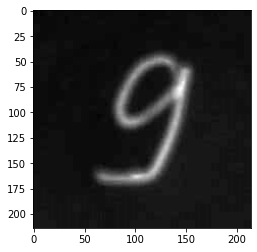

0.0


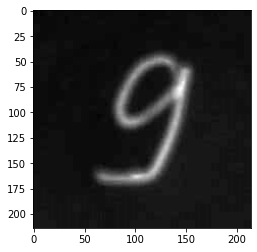

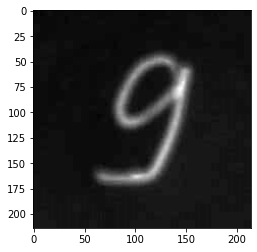

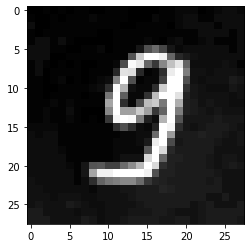

(0, 0, 214, 214)


In [ ]:
#Загружаем картинку
#В строке ниже нужно указать любую из подгруженных командой !wget картинок
#Примеры цифр 1, 2, 4, 7, 8 нарисованы в paint (цифры были взяты у другого участника курса (Андрея))
#Примеры цифр 0, 5, 6, 9 написаны от руки 
#Примеры цифр 1, 2, 4, 7, 8 нарисованы в paint (цифры были взяты у другого участника курса (Андрея))
#Примеры цифр 3, 4_1, 5_1 взяты из интернета и являются предобработанными картинками образов цифр на белом фоне
magicFigure=Image.open('9.jpg')
#Сразу конвертируем только в канал яркости
magicFigure=magicFigure.convert("L")
#Инвертируем, так как используем черные цифры на белом фоне, а сеть обучена распознавать негатив
magicFigure=ImageChops.invert(magicFigure)
#Окружаем цифру прямоугольником (первый этап центрирования и выравнивания изображения)
coord=magicFigure.getbbox()
#Обрезаем картинку по высоте и ширине
#Ширина=coord[2]-coord[0], высота=coord[3]-coord[1]
#Методом Quad можно замостить любой четырехугольник в прямоугольник
#Мы просто вызываем этот метод и указываем, что в новую область нужно вставить
#из старой картинки прямоугольник с координатами лев.верх.точка, лев.ниж.точка, прав.ниж.точка, прав.верх.точка
magicFigure=magicFigure.transform((coord[2]-coord[0],coord[3]-coord[1]), Image.QUAD, data=(coord[0],coord[1],coord[0],coord[3],coord[2],coord[3],coord[2],coord[1]))
print(magicFigure.size)
plt.imshow(magicFigure, cmap='gray')
plt.show()
#Считаем сколько прямоугольной картинке не хватает до квадрата
resizeMeassure=abs(magicFigure.size[0]-magicFigure.size[1])/2
print(resizeMeassure)
#Делаем новую картинку-квадрат по большей стороне старой, причем заполненной черным цветом
#Вставляем нашу обрезанную картинку в квадрат так, чтобы она оказалась по центу
#Величина смещения равна половине отрезка, на который увеличилась картинка
#Смещение стоит производить только по большей стороне
if magicFigure.size[0] > magicFigure.size[1]:
  magicFigure2=Image.new( "L" , (magicFigure.size[0],magicFigure.size[0]) , color=0 )
  magicFigure2.paste(magicFigure,box=(int(resizeMeassure),0))
else:
  magicFigure2=Image.new( "L" , (magicFigure.size[1],magicFigure.size[1]) , color=0 )
  magicFigure2.paste(magicFigure,box=(int(resizeMeassure),0))
plt.imshow(magicFigure2, cmap='gray')
plt.show()
#Слишком сильно обрезала сверху, добавляю полосы черные, точнее делаю овую картинку, 
#которая больше старой и в нее рисую старую, указывая левый верхний угол
magicFigure3=Image.new("L",(magicFigure2.size[1]+int(resizeMeassure),magicFigure2.size[1]+int(resizeMeassure)),color=0)
magicFigure3.paste(magicFigure2,box=(int(resizeMeassure/2),int(resizeMeassure/2)))
plt.imshow(magicFigure3, cmap='gray')
plt.show()
#Теперь мы готовы изменить размер картинки до 28х28,
#для лучшего распознавания еще применим фильтр Image.BILINEAR
magicFigure3=magicFigure3.resize((28,28))
#Повысим контрастность изображения
magicFigure3=ImageOps.autocontrast(magicFigure3,cutoff=3,ignore=None)
#А также поработаем над его яркостью
magicFigure3=ImageEnhance.Brightness(magicFigure3).enhance(0.95)
plt.imshow(magicFigure3, cmap='gray')
plt.show()
print(coord)          




In [ ]:
#Ура! Раз мы ужецентрировали наше изображение и изменили его размер на необходимый, получим соответствующий каналу массив
magicArray=image.img_to_array(magicFigure3)
magicArray= magicArray.astype('float32')
print(magicArray.shape)
#Нужно получить нормированные значения яркости каждого пикселя, поэтому делим на максимальное значение
magicArray=magicArray/255
#Итак получили центрированное изображение в негативе, с нормированным массивом
#Теперь осталось "вытянуть массив в строку и проверить как работает наша нейронная сеть"
magicArray=magicArray.reshape(1,784)
print(magicArray.shape)

(28, 28, 1)
(1, 784)


In [ ]:
magicPred=modelMagic(magicArray)
prediction=np.argmax(magicPred)
print(prediction)
print(magicPred)

9
tf.Tensor(
[[0.01563601 0.00939448 0.00693664 0.10217609 0.07747466 0.01872189
  0.00729448 0.06179735 0.05129552 0.6492729 ]], shape=(1, 10), dtype=float32)


In [ ]:
magicFigure2.close
magicFigure.close

<bound method Image.close of <PIL.Image.Image image mode=L size=43x78 at 0x7FBA53EFD668>>

>Вывод:сеть смогла распознать большое количество цифр, однако на наборе с цифрами, написанными рукой на листе бумаги, сеть работает хуже. Возможно не сделана качественная предобработка. Следует в дальнейшем поработать над этим.

>Работа сети данного задания выполнена с использованием генератора картинок, который позволяет значительно расширить набор загруженных картинок mnist их преобразованными копиями.

>Так как набор, на котором обучалась сеть значительно расширился, то и увеличилась архитектура сети. Получила множество результатов, угадывающих картинки, однако, данная сеть представилась мне наиболее "обучаемой", а не заучивающей последовательности пикселей.